Продолжаем усложнять себе жизнь. Решение МППР методом Монте-Карло позволило избавиться от информационной зависимости к окружающей среде. Теперь агент может  cемплировать информацию в любых объемах, запуская необходимое число эпизодов обучения. И здесь есть трудность технического характера. Функция цености и Q-функция будут обновлены только в конце эпизода, что резко снижает эффектиность обучения в условиях продолжительных эпизодов. А для бесконечных процессов ситуация и вовсе оказывается безнадежной. 

Посмотрим, как можно предолеть возникшие затруднения с помощью методов обучения на основе временных различий (TD-обучение), когда функции ценности обновляются на каждом шаге.

Алгоритм Q-learning <br>
-- это TD-алгоритм с разделенной стратегией. Основным действующим лицом является Q-функция -- это функция ценности, но не отдельного состояния, а пары состояние-действие $(s,a)$.

Вычисление Q-функции происходит по формуле

$Q(s,a) = Q(s,a) + \alpha \left(r + \gamma \max_{a'} Q(s', a') - Q(s,a)\right)$

где $s'$ -- состояние, в которое переходит среда после выполнения действия $a$ из $s$, $r$ -- награда для этого шага, $\alpha$ -- скорость обучения, $\gamma$ -- коэффициент обесценивания. 

По сравнению с уравнениями, которые встречались раньше, эта формула не содержит ничего существенного нового,  просто используется Q-функция. В качестве обучающей среды будем использовать CliffWalking.

In [1]:
import torch
import gym

env = gym.make('CliffWalking-v0')

In [2]:
def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state, Q):
        probs = torch.ones(n_action) * epsilon / n_action
        best_action = torch.argmax(Q[state]).item()
        probs[best_action] += 1.0 - epsilon
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function

In [3]:
from collections import defaultdict

def q_learning(env, gamma, n_episode, alpha):
    """
    Obtain the optimal policy with off-policy Q-learning method
    @param env: OpenAI Gym environment
    @param gamma: discount factor
    @param n_episode: number of episodes
    @return: the optimal Q-function, and the optimal policy
    """
    n_action = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(n_episode):
        state = env.reset()
        is_done = False
        while not is_done:

            action = epsilon_greedy_policy(state, Q)
            next_state, reward, is_done, info = env.step(action)
            td_delta = reward + gamma * torch.max(Q[next_state]) - Q[state][action]
            Q[state][action] += alpha * td_delta

            length_episode[episode] += 1
            total_reward_episode[episode] += reward

            if is_done:
                break
            state = next_state

    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [4]:
gamma = 1
n_episode = 500
alpha = 0.4
epsilon = 0.1

epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

optimal_Q, optimal_policy = q_learning(env, gamma, n_episode, alpha)


print('The optimal policy:\n', optimal_policy)


The optimal policy:
 {36: 0, 24: 1, 12: 2, 0: 3, 13: 1, 1: 0, 2: 1, 3: 1, 4: 1, 5: 3, 6: 1, 7: 2, 8: 1, 9: 1, 10: 2, 11: 2, 23: 2, 22: 2, 21: 1, 20: 2, 35: 2, 34: 1, 33: 1, 32: 1, 19: 2, 18: 1, 17: 2, 16: 1, 15: 1, 14: 1, 31: 1, 30: 1, 29: 1, 28: 1, 27: 1, 26: 1, 47: 0, 25: 1}


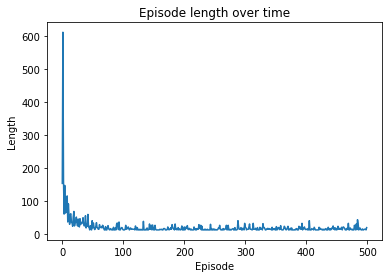

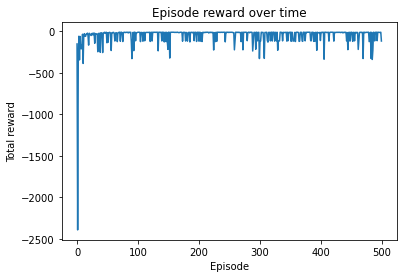

In [5]:
import matplotlib.pyplot as plt
plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()


plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()